In [2]:
%matplotlib widget
import string

from because.probability import prob

from because.synth import read_data
from because.visualization import viz
#import matplotlib

r = read_data.Reader('/home/roger/Datasets/llcp.csv')
ds = r.read()

ps0 = prob.ProbSpace(ds)
ps = ps0.SubSpace([('income', 0,9),('education','1-college','2-somecollege','3-hs','4-somehs','5-elementary')], power=5)


hbe:  0.9490824254306831
getData:  359460 records read.


In [89]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

# Question: What is the direct causal effect of gender on income?

Related Variables:
    - Gender
    - Income
    - Education
    - Age
    - Height
    - Weight
    - General Health
    - Marital Status

In [72]:
target = 'income'
cause = 'gender'
allVars = ['gender', 'income', 'education', 'age', 'height', 'weight', 'genhealth', 'married']

## Step 1: Examine individual variables

Viz.show: Target =  [('gender',), ('income',), ('education',), ('age',)] , Condition =  []
Viz.show: Showing graph =  Multi Variable PDF Plot , power =  None
vars =  ['gender', 'income', 'education', 'age']


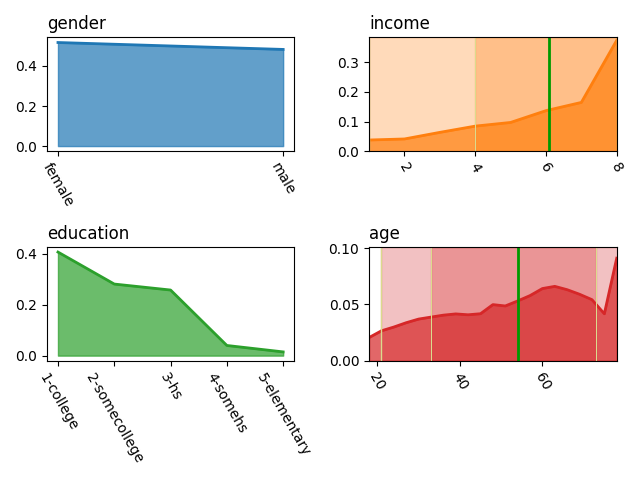

Viz.show: Target =  [('height',), ('genhealth',), ('married',)] , Condition =  []
Viz.show: Showing graph =  Multi Variable PDF Plot , power =  None
vars =  ['height', 'genhealth', 'married']


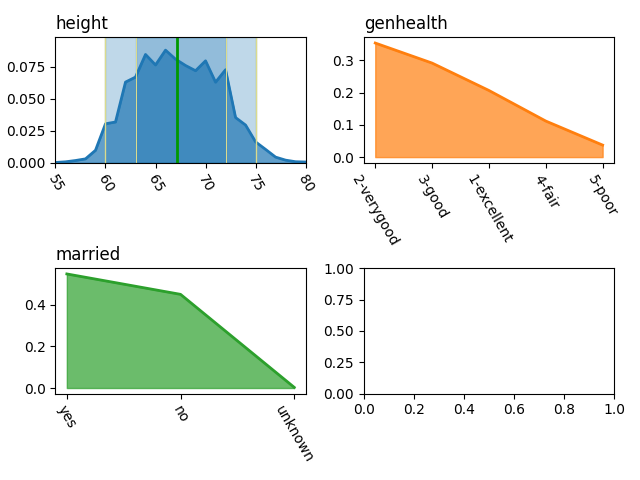

In [35]:
viz.show(probspace=ps, targetSpec = allVars[:4], gtype = 'multi')
viz.show(probspace=ps, targetSpec = allVars[4:], gtype = 'multi')

## Step 2: Examine Pairwise relationships with the target variable (income).

### Income versus gender

Viz.show: Target =  [('income',)] , Condition =  [('gender',)]
Viz.show: Showing graph =  2D Expected value plot with single condition , power =  None
Dimensions =  2 .  Conditionals =  1
Number of points to test for each conditional =  50
Elapsed Time =  1.255


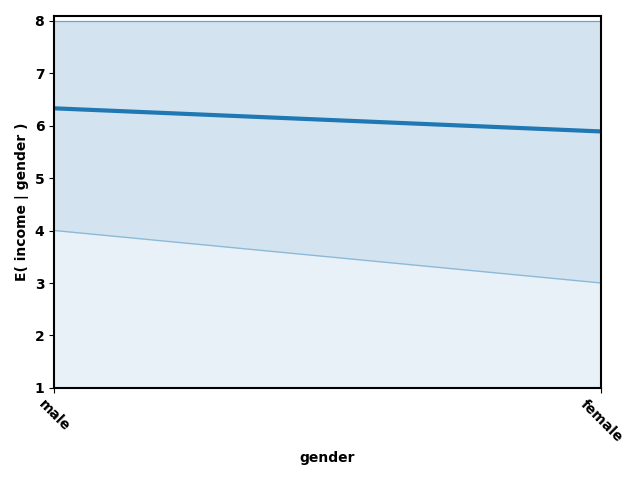

income for female / male / female - male 5.89 6.33 -0.44
p16 for female / male / diff 3.0 4.0 -1.0


In [11]:
viz.show(probspace=ps, targetSpec=['income'], condSpec=['gender'], gtype='exp')
inf = round(ps.E('income',[('gender', 'female')]),2)
inm = round(ps.E('income',[('gender', 'male')]),2)
diff = round(inf - inm, 2)
print('income for female / male / female - male', inf, inm, diff)
df = ps.distr('income', [('gender', 'female')])
dm = ps.distr('income', [('gender', 'male')])
f16 = round(df.percentile(16),2)
m16 = round(dm.percentile(16),2)
diff16 = round(f16 - m16,2)
print('p16 for female / male / diff', f16, m16, diff16)

### Observations:  
- Males have a higher income level than females (-.44).

### Income versus Education

Viz.show: Target =  [('income',)] , Condition =  [('education',)]
Viz.show: Showing graph =  2D Expected value plot with single condition , power =  1
Dimensions =  2 .  Conditionals =  1
Number of points to test for each conditional =  50
Elapsed Time =  4.683


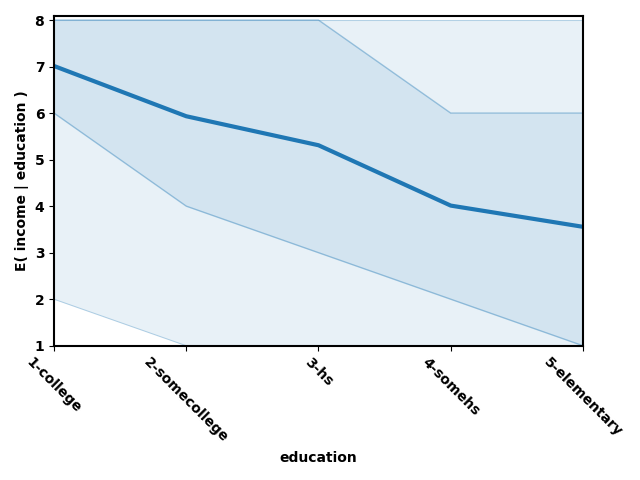

In [12]:
viz.show(probspace=ps, targetSpec=['income'], condSpec=['education'], gtype='exp')

### Observations: 
- As expected, higher education leads to higher income.

### Income versus Age

Viz.show: Target =  [('income',)] , Condition =  [('age',)]
Viz.show: Showing graph =  2D Expected value plot with single condition , power =  1
Dimensions =  2 .  Conditionals =  1
Number of points to test for each conditional =  50
Elapsed Time =  12.684


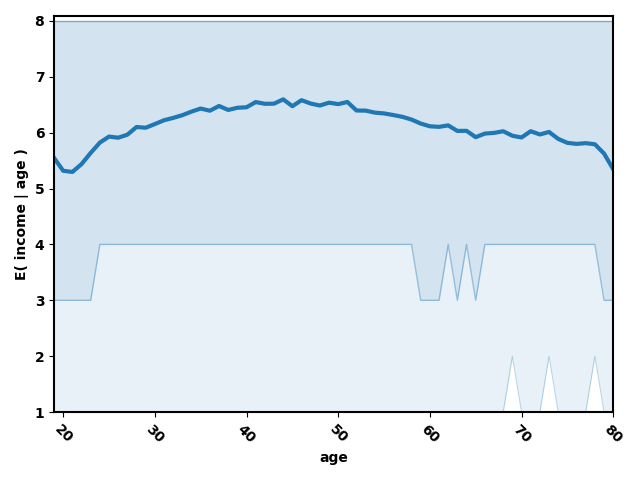

In [111]:
viz.show(probspace=ps, targetSpec=['income'], condSpec=['age'], gtype='exp')

### Observations: 
- Income peaks at around 45 years old and tails off quickly at around 78 years old.

### Income versus Height

Viz.show: Target =  [('income',)] , Condition =  [('height',)]
Viz.show: Showing graph =  2D Expected value plot with single condition , power =  1
Dimensions =  2 .  Conditionals =  1
Number of points to test for each conditional =  50
Elapsed Time =  7.763


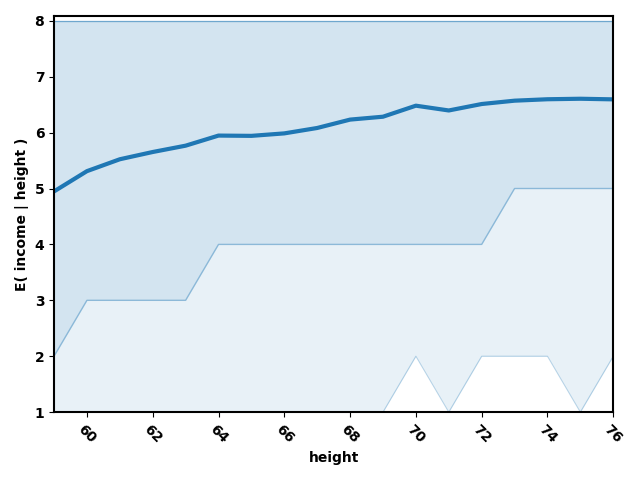

In [14]:
viz.show(probspace=ps, targetSpec=['income'], condSpec=['height'], gtype='exp')

### Observations: 
- There is a clear correlation between income and height.
- Possible hypotheses include:
    - height is correlated with strength
    - height is correlated with physical appeal

### Income versus Weight

Viz.show: Target =  [('income',)] , Condition =  [('weight',)]
Viz.show: Showing graph =  2D Expected value plot with single condition , power =  None
Dimensions =  2 .  Conditionals =  1
Number of points to test for each conditional =  50
Elapsed Time =  9.768


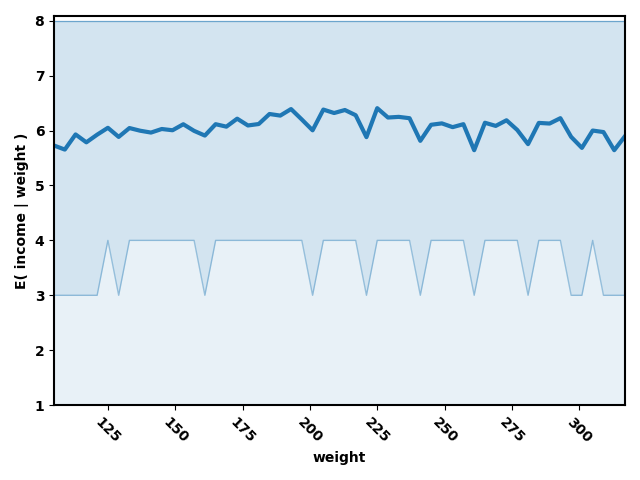

Viz.show: Target =  [('income',)] , Condition =  [('weight',)]
Viz.show: Showing graph =  2D Expected value plot with single condition , power =  None
Viz.show: Controlling for  ['gender']
Dimensions =  2 .  Conditionals =  1
Number of points to test for each conditional =  50
Elapsed Time =  22.945


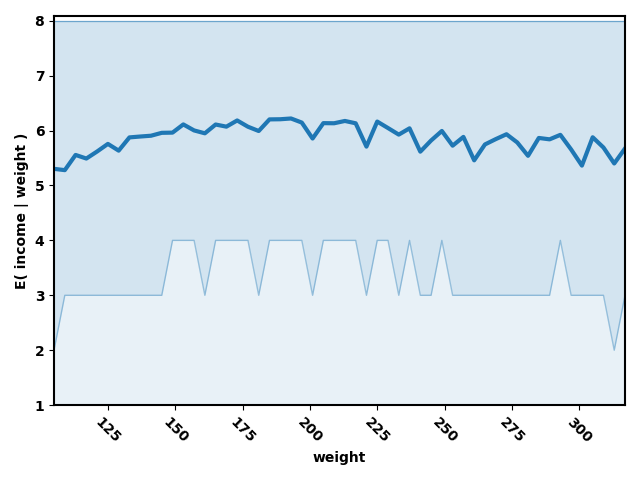

Viz.show: Target =  [('income',)] , Condition =  [('weight',)]
Viz.show: Showing graph =  2D Expected value plot with single condition , power =  None
Viz.show: Controlling for  ['height']
Dimensions =  2 .  Conditionals =  1
Number of points to test for each conditional =  50
Elapsed Time =  26.107


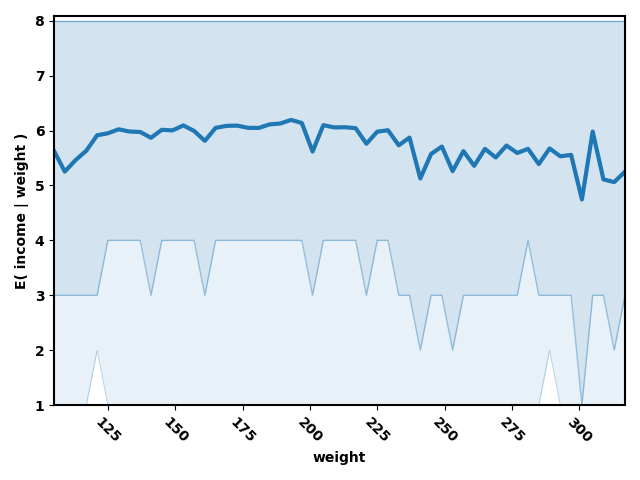

Viz.show: Target =  [('income',)] , Condition =  [('weight',)]
Viz.show: Showing graph =  2D Expected value plot with single condition , power =  None
Viz.show: Controlling for  ['gender', 'height']
Dimensions =  2 .  Conditionals =  1
Number of points to test for each conditional =  50
Elapsed Time =  42.53


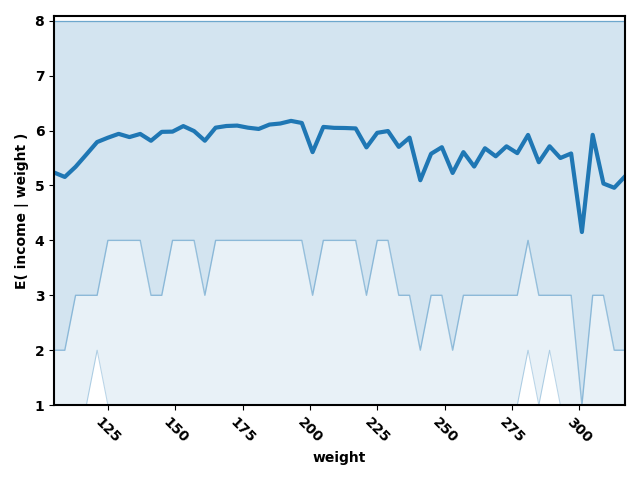

In [76]:
viz.show(probspace=ps, targetSpec=['income'], condSpec=['weight'], gtype='exp')
viz.show(probspace=ps, targetSpec=['income'], condSpec=['weight'], controlFor=['gender'], gtype='exp')
viz.show(probspace=ps, targetSpec=['income'], condSpec=['weight'], controlFor=['height'], gtype='exp')
viz.show(probspace=ps, targetSpec=['income'], condSpec=['weight'], controlFor=['gender','height'], gtype='exp')

### Income versus General Health

Viz.show: Target =  [('income',)] , Condition =  [('genhealth',)]
Viz.show: Showing graph =  2D Expected value plot with single condition , power =  1
Dimensions =  2 .  Conditionals =  1
Number of points to test for each conditional =  50
Elapsed Time =  4.434


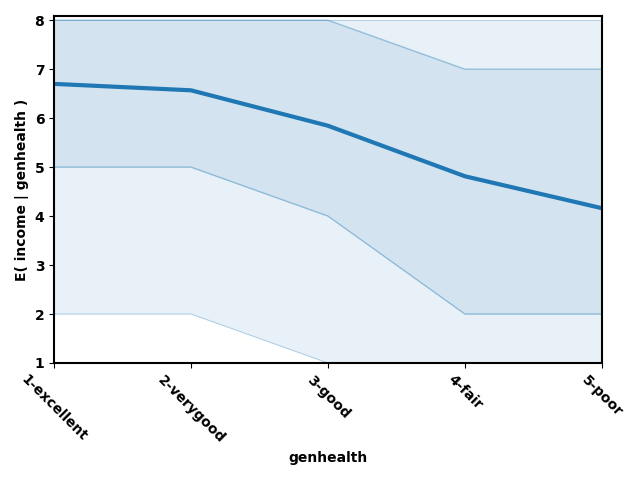

In [15]:
viz.show(probspace=ps, targetSpec=['income'], condSpec=['genhealth'], gtype='exp')

### Observations:  
- Better health correlates with higher income.
- The causal direction is not yet understood.
- Either hypothesis is feasible.

## Step 3: Examine pairwise relationships with the control variable (gender).

### Education versus Gender

Viz.show: Target =  [('education',)] , Condition =  [('gender',)]
Viz.show: Showing graph =  2-variable Probability Distribution plot. , power =  None
Controlling for:  [] , power =  None
psy_x =  0.41225764259335246 , tSpec, cSpec =  (1.0,) [('gender', 1.0)]
psy_x =  0.4008161975362926 , tSpec, cSpec =  (1.0,) [('gender', 2.0)]
psy_x =  0.2953362228149364 , tSpec, cSpec =  (2.0,) [('gender', 1.0)]
psy_x =  0.26582756796493373 , tSpec, cSpec =  (2.0,) [('gender', 2.0)]
psy_x =  0.24126743947476406 , tSpec, cSpec =  (3.0,) [('gender', 1.0)]
psy_x =  0.2751300213667874 , tSpec, cSpec =  (3.0,) [('gender', 2.0)]
psy_x =  0.03833478662289701 , tSpec, cSpec =  (4.0,) [('gender', 1.0)]
psy_x =  0.04159309667268967 , tSpec, cSpec =  (4.0,) [('gender', 2.0)]
psy_x =  0.012803908494050062 , tSpec, cSpec =  (5.0,) [('gender', 1.0)]
psy_x =  0.016633116459296615 , tSpec, cSpec =  (5.0,) [('gender', 2.0)]
Test Time =  0.009
String Value Mappings:
     education: 1-college=1, 2-somecollege=2, 3-hs=

/usr/local/lib/python3.8/dist-packages/because/visualization/probPlot2D.py:168: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()


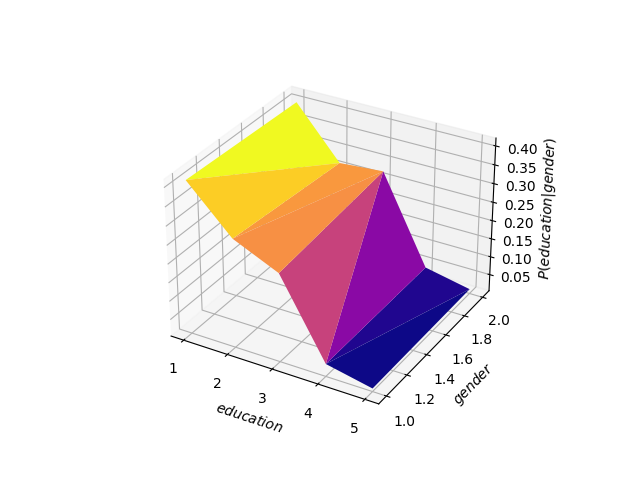

Viz.show: Target =  [('education', '1-college')] , Condition =  [('gender',)]
Viz.show: Showing graph =  2D Bound Probability plot with 1 conditional. , power =  None
Dimensions =  2 .  Conditionals =  1
Number of points to test for each conditional =  35
Test Time =  0.0


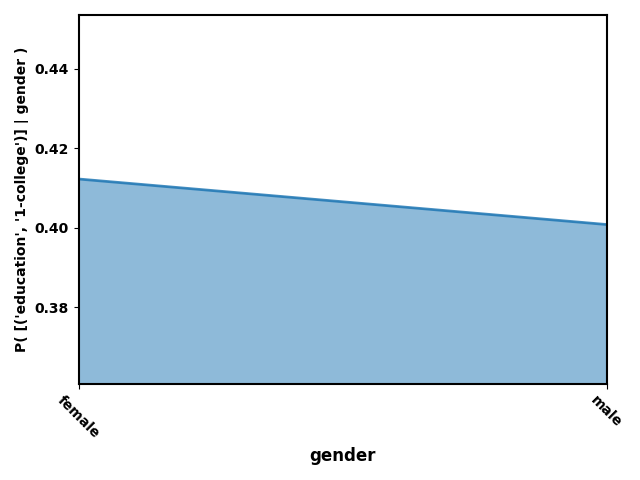

Viz.show: Target =  [('education', '1-college', '2-somecollege')] , Condition =  [('gender',)]
Viz.show: Showing graph =  2D Bound Probability plot with 1 conditional. , power =  None
Dimensions =  2 .  Conditionals =  1
Number of points to test for each conditional =  35
Test Time =  0.0


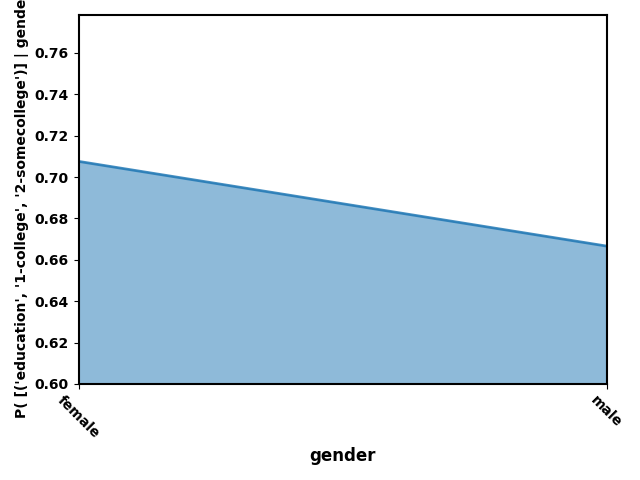

Viz.show: Target =  [('education', '4-somehs', '5-elementary')] , Condition =  [('gender',)]
Viz.show: Showing graph =  2D Bound Probability plot with 1 conditional. , power =  None
Dimensions =  2 .  Conditionals =  1
Number of points to test for each conditional =  35
Test Time =  0.0


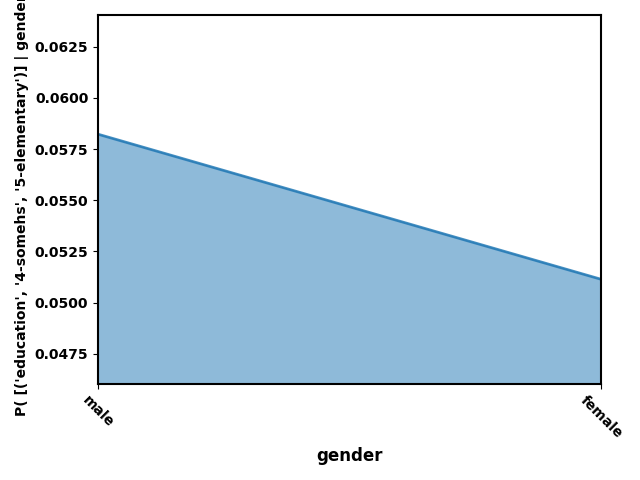

In [27]:
viz.show(probspace=ps, targetSpec=[('education',)], condSpec=['gender'], gtype='pdf')
viz.show(probspace=ps, targetSpec=[('education', '1-college')], condSpec=['gender'], gtype='pdf')
viz.show(probspace=ps, targetSpec=[('education', '1-college','2-somecollege')], condSpec=['gender'], gtype='pdf')
viz.show(probspace=ps, targetSpec=[('education', '4-somehs','5-elementary')], condSpec=['gender'], gtype='pdf')

In [28]:
df = ps.distr('education', ('gender', 'female'))
dm = ps.distr('education', ('gender', 'male'))
hf = df.ToHistTuple()
hm = dm.ToHistTuple()
combined = [hf[i][1:] + hm[i][2:] + (hf[i][2]-hm[i][2],) for i in range(len(hf))]
print('histogram = ', combined)
for tup in combined:
    print(tup[0], round(tup[1],3), round(tup[2],3), round(tup[3],3))
print('average education: women / men', df.E(), dm.E(), df.E() - dm.E())
df = ps.distr('education', [('gender', 'female'), 'age'])
dm = ps.distr('education', [('gender', 'male'), 'age'])
print('average education (age adjusted): women / men', df.E(), dm.E(), df.E() - dm.E())

histogram =  [(1.0, 0.41225764259335246, 0.4008161975362926, 0.011441445057059851), (2.0, 0.2953362228149364, 0.26582756796493373, 0.029508654850002647), (3.0, 0.24126743947476406, 0.2751300213667874, -0.03386258189202332), (4.0, 0.03833478662289701, 0.04159309667268967, -0.0032583100497926634), (5.0, 0.012803908494050062, 0.016633116459296615, -0.0038292079652465522)]
1.0 0.412 0.401 0.011
2.0 0.295 0.266 0.03
3.0 0.241 0.275 -0.034
4.0 0.038 0.042 -0.003
5.0 0.013 0.017 -0.004
average education: women / men 1.944091095609356 2.007399366553764 -0.06330827094440816
average education (age adjusted): women / men 1.941546941148974 2.011733833968584 -0.07018689281960988


### Observations:
- Women have a higher rate of college graduation (+.011).
- Women have a higher rate of some college (+.041).
- Men have a higher rate of high school incompletion (-.007).

### Age versus Gender

Viz.show: Target =  [('age',)] , Condition =  [('gender',)]
Viz.show: Showing graph =  2D Expected value plot with single condition , power =  None
Dimensions =  2 .  Conditionals =  1
Number of points to test for each conditional =  50
Elapsed Time =  1.6


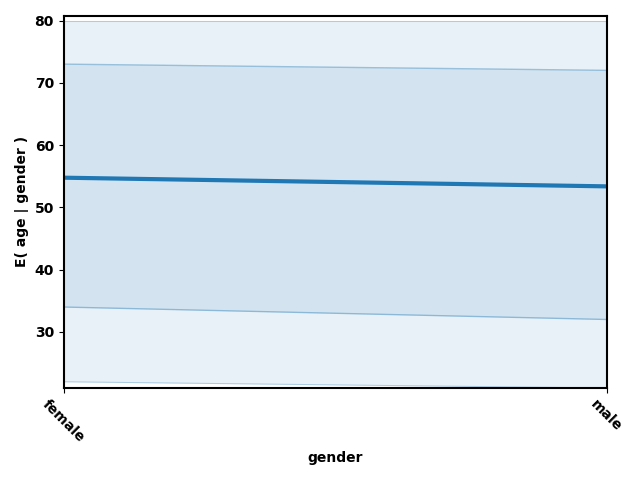

Viz.show: Target =  [('gender', 'female')] , Condition =  [('age',)]
Viz.show: Showing graph =  2D Bound Probability plot with 1 conditional. , power =  None
Dimensions =  2 .  Conditionals =  1
Number of points to test for each conditional =  35
Test Time =  0.0


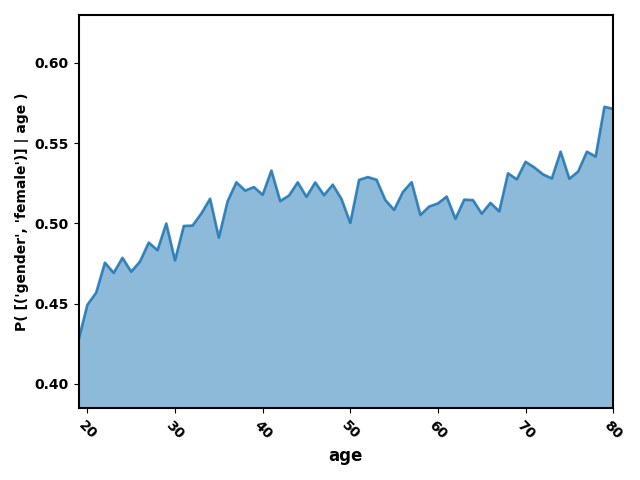

45.061 44.343 0.718


In [99]:
viz.show(probspace=ps, targetSpec=['age'], condSpec=['gender'], gtype='exp')
viz.show(probspace=ps, targetSpec=[('gender','female')], condSpec=['age'], gtype='pdf')
ef = ps.E('age', [('gender', 'female'), ('age', None, 65)])
em = ps.E('age', [('gender', 'male'), ('age', None, 65)])
diff = ef - em
print(round(ef, 3), round(em, 3), round(diff,3))



### Observations: 
- Females had a slightly higher age in the survey than males (54.8 versus 53.4 / +1.39)

### General Health versus Gender

Viz.show: Target =  [('genhealth',)] , Condition =  [('gender',)]
Viz.show: Showing graph =  2-variable Probability Distribution plot. , power =  None
Controlling for:  [] , power =  None
psy_x =  0.19882283545342636 , tSpec, cSpec =  (1.0,) [('gender', 1.0)]
psy_x =  0.2145816300591537 , tSpec, cSpec =  (1.0,) [('gender', 2.0)]
psy_x =  0.35540623717685677 , tSpec, cSpec =  (2.0,) [('gender', 1.0)]
psy_x =  0.3511847917940544 , tSpec, cSpec =  (2.0,) [('gender', 2.0)]
psy_x =  0.2893478149363972 , tSpec, cSpec =  (3.0,) [('gender', 1.0)]
psy_x =  0.2933295775422011 , tSpec, cSpec =  (3.0,) [('gender', 2.0)]
psy_x =  0.11729970250307756 , tSpec, cSpec =  (4.0,) [('gender', 1.0)]
psy_x =  0.10566597734158692 , tSpec, cSpec =  (4.0,) [('gender', 2.0)]
psy_x =  0.0391234099302421 , tSpec, cSpec =  (5.0,) [('gender', 1.0)]
psy_x =  0.035238023263003855 , tSpec, cSpec =  (5.0,) [('gender', 2.0)]
Test Time =  6.198
String Value Mappings:
     genhealth: 1-excellent=1, 2-verygood=2, 3-good=3,

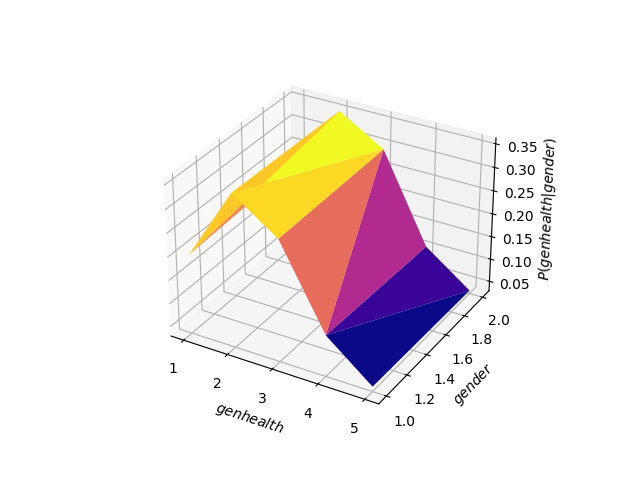

Viz.show: Target =  [('genhealth', 1, 2)] , Condition =  [('gender',)]
Viz.show: Showing graph =  2D Bound Probability plot with 1 conditional. , power =  None
Dimensions =  2 .  Conditionals =  1
Number of points to test for each conditional =  35
Test Time =  0.0


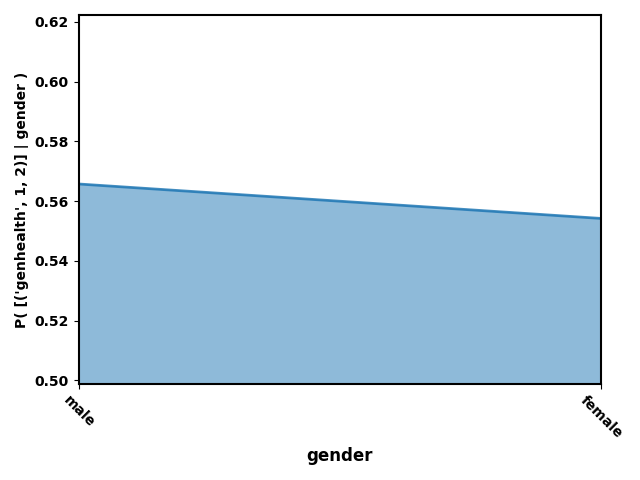

Viz.show: Target =  [('genhealth', 1, 2, 3)] , Condition =  [('gender',)]
Viz.show: Showing graph =  2D Bound Probability plot with 1 conditional. , power =  None
Dimensions =  2 .  Conditionals =  1
Number of points to test for each conditional =  35
Test Time =  0.0


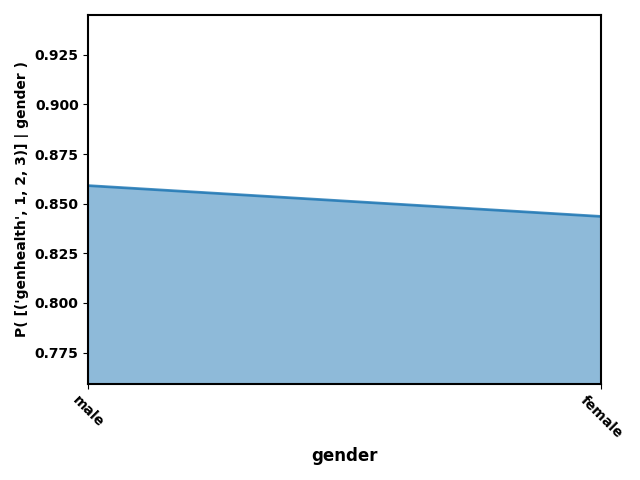

In [16]:
viz.show(probspace=ps, targetSpec=['genhealth'], condSpec=['gender'], gtype='pdf')
viz.show(probspace=ps, targetSpec=[('genhealth', 1, 2)], condSpec=['gender'], gtype='pdf')
viz.show(probspace=ps, targetSpec=[('genhealth', 1, 2, 3)], condSpec=['gender'], gtype='pdf')


In [24]:
df = ps.distr('genhealth', ('gender', 'female'))
dm = ps.distr('genhealth', ('gender', 'male'))
hf = df.ToHistTuple()
hm = dm.ToHistTuple()
combined = [hf[i][1:] + hm[i][2:] + (hf[i][2]-hm[i][2],) for i in range(len(hf))]
print('histogram = ', combined)
for tup in combined:
    print(tup[0], round(tup[1],3), round(tup[2],3), round(tup[3],3))
print('average health: women / men', df.E(), dm.E(), df.E() - dm.E())
df = ps.distr('genhealth', [('gender', 'female'), 'age'])
dm = ps.distr('genhealth', [('gender', 'male'), 'age'])
print('average health (age adjusted): women / men', df.E(), dm.E(), df.E() - dm.E())


histogram =  [(1.0, 0.19882283545342636, 0.2145816300591537, -0.01575879460572735), (2.0, 0.35540623717685677, 0.3511847917940544, 0.004221445382802391), (3.0, 0.2893478149363972, 0.2933295775422011, -0.003981762605803907), (4.0, 0.11729970250307756, 0.10566597734158692, 0.011633725161490638), (5.0, 0.0391234099302421, 0.035238023263003855, 0.0038853866672382484)]
1.0 0.199 0.215 -0.016
2.0 0.355 0.351 0.004
3.0 0.289 0.293 -0.004
4.0 0.117 0.106 0.012
5.0 0.039 0.035 0.004
average health: women / men 2.4424946142798523 2.395793971955233 0.046700642324619235
average health: women / men 2.4040509605634326 2.3793740062416746 0.024676954321757982


### Observations:
- Men report better general health than women (-.046)
- Men report better age adjusted general health than women (-.025)
- Men report excellent more often (-.016)
- Women report very good more often (+.004)
- Men report good more often (-.004)
- Women report fair / poor more often (+.012 / +.004)

### Height versus Gender

Viz.show: Target =  [('height',)] , Condition =  [('gender',)]
Viz.show: Showing graph =  2D Expected value plot with single condition , power =  1
Dimensions =  2 .  Conditionals =  1
Number of points to test for each conditional =  50
Elapsed Time =  2.635


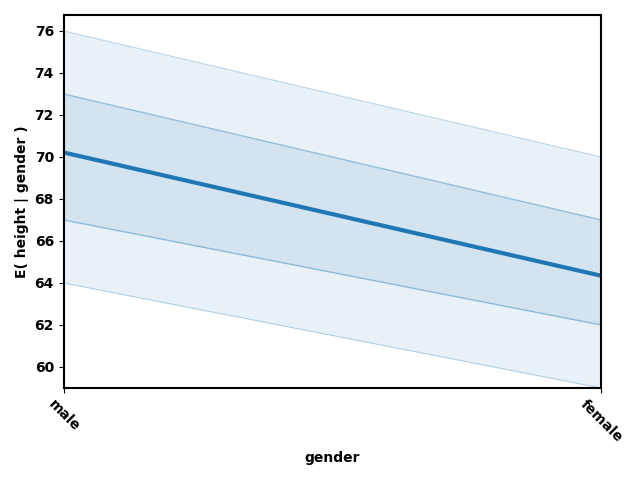

In [41]:
viz.show(probspace=ps, targetSpec=[('height')], condSpec=['gender'], gtype='exp')

### Observations: 
- As expected, men are taller than women (70 versus 64 inches).

### Weight versus Gender

Viz.show: Target =  [('weight',)] , Condition =  [('gender',)]
Viz.show: Showing graph =  2D Expected value plot with single condition , power =  None
Dimensions =  2 .  Conditionals =  1
Number of points to test for each conditional =  50
Elapsed Time =  1.2


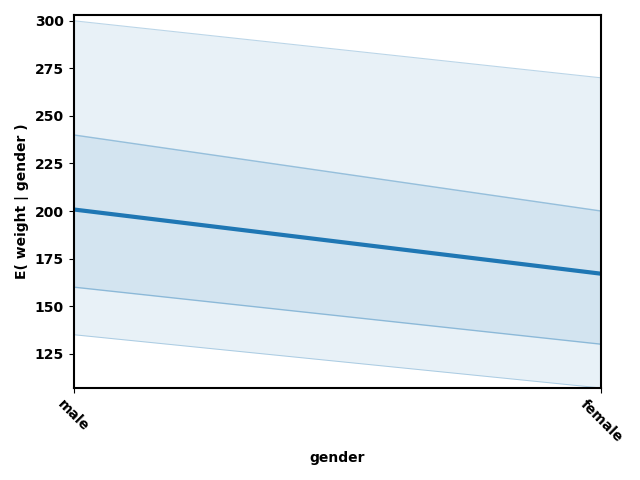

167.05 200.814 -33.764


In [91]:
viz.show(probspace=ps, targetSpec=[('weight')], condSpec=['gender'], gtype='exp')
ef = ps.E('weight', [('gender', 'female')])
em = ps.E('weight', [('gender', 'male')])
diff = ef - em
print(round(ef, 3), round(em, 3), round(diff,3))


### Observations:
- As expected, men weigh more than women (201 vs 167 lbs.  / -33.8)

### Marriage versus Gender

Viz.show: Target =  [('married', 'yes')] , Condition =  [('gender',)]
Viz.show: Showing graph =  2D Bound Probability plot with 1 conditional. , power =  None
Dimensions =  2 .  Conditionals =  1
Number of points to test for each conditional =  35
Test Time =  1.816


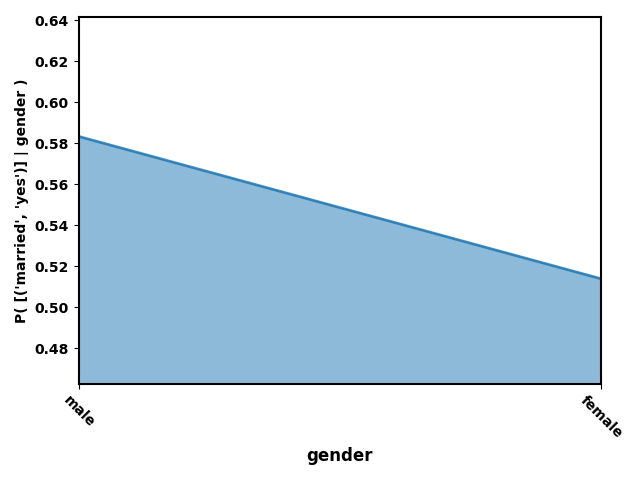

Viz.show: Target =  [('maritaldetail',)] , Condition =  [('gender',)]
Viz.show: Showing graph =  2-variable Probability Distribution plot. , power =  None
Controlling for:  [] , power =  None
psy_x =  0.14822271235125153 , tSpec, cSpec =  (1.0,) [('gender', 1.0)]
psy_x =  0.12286246247071514 , tSpec, cSpec =  (1.0,) [('gender', 2.0)]
psy_x =  0.4922099405006155 , tSpec, cSpec =  (2.0,) [('gender', 1.0)]
psy_x =  0.5658488660487933 , tSpec, cSpec =  (2.0,) [('gender', 2.0)]
psy_x =  0.15605124128026263 , tSpec, cSpec =  (3.0,) [('gender', 1.0)]
psy_x =  0.19331102759819446 , tSpec, cSpec =  (3.0,) [('gender', 2.0)]
psy_x =  0.02159417316372589 , tSpec, cSpec =  (4.0,) [('gender', 1.0)]
psy_x =  0.017505650862572397 , tSpec, cSpec =  (4.0,) [('gender', 2.0)]
psy_x =  0.0030583196553139107 , tSpec, cSpec =  (5.0,) [('gender', 1.0)]
psy_x =  0.0032771567745082547 , tSpec, cSpec =  (5.0,) [('gender', 2.0)]
psy_x =  0.03774492203528929 , tSpec, cSpec =  (6.0,) [('gender', 1.0)]
psy_x =  0.04

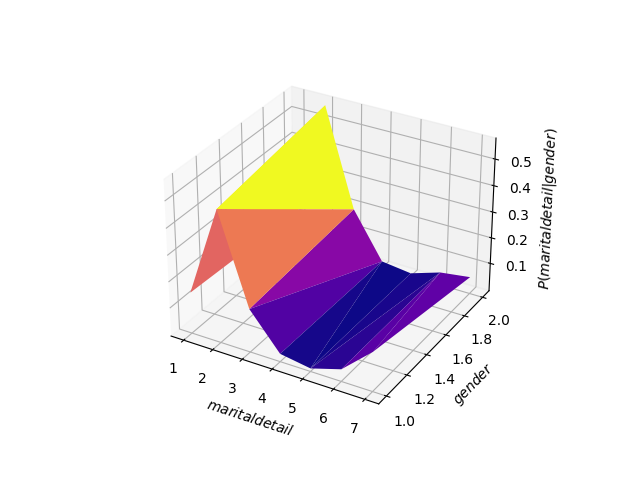

In [25]:
viz.show(probspace=ps, targetSpec=[('married', 'yes')], condSpec=['gender'], gtype='pdf')
viz.show(probspace=ps, targetSpec=[('maritaldetail',)], condSpec=['gender'], gtype='pdf')


In [30]:
df = ps.distr('maritaldetail', ('gender', 'female'))
dm = ps.distr('maritaldetail', ('gender', 'male'))
hf = df.ToHistTuple()
hm = dm.ToHistTuple()
combined = [hf[i][1:] + hm[i][2:] + (hf[i][2]-hm[i][2],) for i in range(len(hf))]
print('histogram = ', combined)
for tup in combined:
    print(tup[0], round(tup[1],3), round(tup[2],3), round(tup[3],3))


histogram =  [(1.0, 0.14822271235125153, 0.12286246247071514, 0.025360249880536395), (2.0, 0.4922099405006155, 0.5658488660487933, -0.07363892554817775), (3.0, 0.15605124128026263, 0.19331102759819446, -0.03725978631793184), (4.0, 0.02159417316372589, 0.017505650862572397, 0.004088522301153495), (5.0, 0.0030583196553139107, 0.0032771567745082547, -0.000218837119194344), (6.0, 0.03774492203528929, 0.04078926576573482, -0.0030443437304455284), (7.0, 0.14111869101354124, 0.0564055704794817, 0.08471312053405955)]
1.0 0.148 0.123 0.025
2.0 0.492 0.566 -0.074
3.0 0.156 0.193 -0.037
4.0 0.022 0.018 0.004
5.0 0.003 0.003 -0.0
6.0 0.038 0.041 -0.003
7.0 0.141 0.056 0.085


### Observations:
- A higher percentage of men in the survey report being married (.58 versus .51)
- Slightly higher percent of women report being divorced (.15 versus .12)
- More women report being widowed (.14 versus .06)
- More men report being never married (.16 versus .19)

## Step 4: Analyze intermediary variables.

In [73]:
reff = ps.E(target, [('gender', 'female')])
refm = ps.E(target, [('gender', 'male')])
refdiff = reff - refm
print('Reference Effect = ', reffdiff)
effects = []
print('\nIntermediary variable analysis:')
for var in allVars[2:]:
    ef = ps.E(target, [('gender', 'female'), var])
    em = ps.E(target, [('gender', 'male'), var])
    diff = ef - em
    effect = diff - refdiff
    effects.append((abs(effect), effect, var))
    print('  ', var, ef, em, diff, diff - refdiff)
effects.sort()
effects.reverse()
print('\nStrongest Intermediary Effects:')
for ef in effects:
    strength, effect, var = ef
    print('   ', str.ljust(var, 12), str.rjust(str(round(effect,3)), 7))

Reference Effect =  -0.44083320015570315

Intermediary variable analysis:
   education 5.859606382853542 6.350338954799559 -0.49073257194601716 -0.04989937179031401
   age 5.955532733460713 6.384178346692418 -0.4286456132317049 0.01218758692399824
   height 6.049718068015953 5.884040698674871 0.16567736934108268 0.6065105694967858
   weight 5.9856489595175075 5.753333140252952 0.23231581926455558 0.6731490194202587
   genhealth 5.90198267444951 6.314329042979862 -0.41234636853035234 0.028486831625350817
   married 5.943436122419971 6.277609907859065 -0.33417378543909404 0.10665941471660911

Strongest Intermediary Effects:
    weight         0.673
    height         0.607
    married        0.107
    education      -0.05
    genhealth      0.028
    age            0.012


### Observations:
- Height and weight individuallly have the highest effect.  They both reduce the apparent bias (+.673 / +.607). What is the effect of controlling both together?
- Marital Status (i.e. married = yes) has a significant effect.  It decreases the apparent bias (+.107).
- Education inreases the apparent bias (-.05).
- General Health decreases the apparent bias (+.028)
- Age slightly decreases the apparent bias (+.012)


## Step 5: Analyze combinations of Intermediary Variables

In [96]:
intCombos = [[], ['height'], ['weight'], ['height', 'weight'], [('married', 'no')], [('married', 'no'), 'height'],
            [('married', 'no'), 'height', 'education'],
            [('married', 'no'), 'height', 'weight', 'education'],
            [('married', 'no'), 'height', 'genhealth'],
            [('married', 'no'), 'height', 'age'],
            [('married', 'no'), 'height','education', 'genhealth'],
            [('married', 'no'), 'height','education', 'genhealth', 'age'],
            [('married', 'no'), 'height','education', 'genhealth', 'weight'],
            [('married', 'no'), 'height',('education','1-college'), 'genhealth', 'age'],
            [('married', 'no'), 'height',('education',3,4,5), 'genhealth', 'age'],
            [('married', 'no'), 'height',('education',3,4,5), 'genhealth', 'weight']]

for combo in intCombos:
    ef = ps.E(target, [('gender', 'female')] + combo)
    em = ps.E(target, [('gender', 'male')] + combo)
    diff = ef - em
    effect = diff - refdiff
    print(str.rjust(str(round(ef,3)),7), str.rjust(str(round(em,3)), 7), str.rjust(str(round(diff,3)),7), 
          str.rjust(str(round(effect,3)),7), combo)
#viz.show(probspace=ps, targetSpec=[('income',)], condSpec=['gender'], controlFor=[], gtype='exp')
#viz.show(probspace=ps, targetSpec=[('income',)], condSpec=['gender'], controlFor=['height'], gtype='exp')
#print('E(income) | male / female)= ', ps.E('income', ('gender','male')), ps.E('income', ('gender','female')))
#print('E(income) | male / female, genhealh)= ', ps.E('income', [('gender','male'),'genhealth']),
#      ps.E('income', [('gender','female'),'genhealth']))

  5.887   6.328  -0.441     0.0 []
   6.05   5.884   0.166   0.607 ['height']
  5.986   5.753   0.232   0.673 ['weight']
  5.953    5.05   0.903   1.344 ['height', 'weight']
  5.021   5.516  -0.495  -0.054 [('married', 'no')]
  5.216   5.152   0.065   0.506 [('married', 'no'), 'height']
  5.281   5.416  -0.135   0.306 [('married', 'no'), 'height', 'education']
  4.926   4.614   0.312   0.753 [('married', 'no'), 'height', 'weight', 'education']
  5.261   5.237   0.025   0.466 [('married', 'no'), 'height', 'genhealth']
  4.797   5.243  -0.446  -0.005 [('married', 'no'), 'height', 'age']
  5.312   5.444  -0.131   0.309 [('married', 'no'), 'height', 'education', 'genhealth']
  4.294   4.531  -0.237   0.204 [('married', 'no'), 'height', 'education', 'genhealth', 'age']
  4.617   3.644   0.973   1.414 [('married', 'no'), 'height', 'education', 'genhealth', 'weight']
  4.994   4.828   0.167   0.608 [('married', 'no'), 'height', ('education', '1-college'), 'genhealth', 'age']
  3.339   3.957  

Viz.show: Filtering by:  [('married', 'no')]
Viz.show: Filtered N =  135521
Viz.show: Target =  [('income',)] , Condition =  [('gender',), ('education',)]
Viz.show: Showing graph =  3D Expected value plot with two conditions , power =  None
Viz.show: Controlling for  ['genhealth', 'age', 'height']
nTests =  10
Test Time =  60.512
String Value Mappings:
     gender: female=1, male=2
     education: 1-college=1, 2-somecollege=2, 3-hs=3, 4-somehs=4, 5-elementary=5, 6-none=6, 7-unknown=7



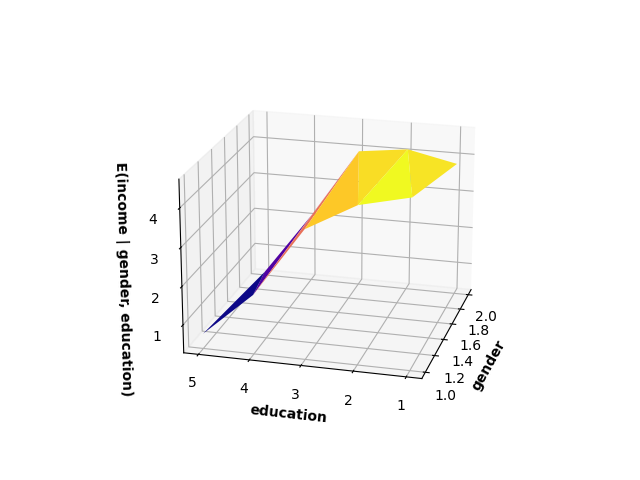

In [97]:
viz.show(probspace=ps, targetSpec=[('income',)], condSpec=['gender','education'], 
         controlFor=['genhealth', 'age', 'height'], filtSpec=[('married', 'no')], gtype='exp')

Viz.show: Filtering by:  [('married', 'no'), ('education', '1-college')]
Viz.show: Filtered N =  45407
Viz.show: Target =  [('income',)] , Condition =  [('gender',)]
Viz.show: Showing graph =  2D Expected value plot with single condition , power =  None
Viz.show: Controlling for  ['genhealth', 'age', 'height']
Dimensions =  2 .  Conditionals =  1
Number of points to test for each conditional =  40
Elapsed Time =  77.251


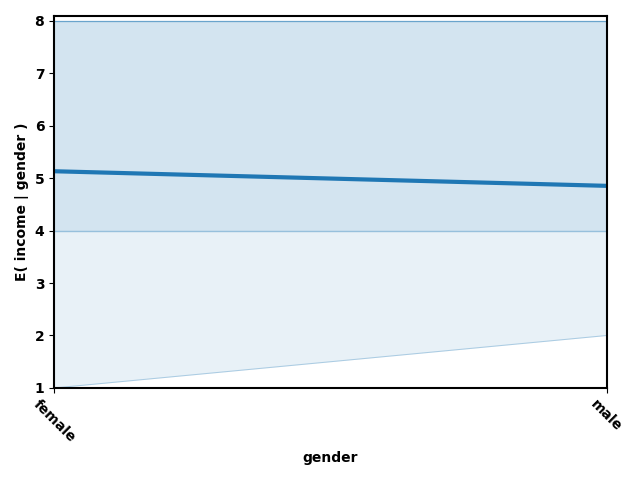

In [67]:
viz.show(probspace=ps, targetSpec=[('income',)], condSpec=['gender'], 
         controlFor=['genhealth', 'age', 'height'], filtSpec=[('married', 'no'), ('education', '1-college')], gtype='exp')

### Observations: 
- Women have lower average income than men (-.44)
- For any given height, women have a slightly higher income than men (+.17)
- That differential mostly evaporates, when we only look at only unmarried individuals (+.07)
- For any given education level and height, there is a slight income advantage for men (-.14)
- For any given level of reported health and height, the incomes are roughtly equal (.02)
- When we control for height, education, and health, men have a slight income advantage (-.13)
- Adding a control for age increases the differential in favor of men (-.27)
- If we only consider individuals with a college degree, women have a slight advantage, when all other factors are controlled (+.16)

Viz.show: Target =  [('income',)] , Condition =  [('gender',)]
Viz.show: Showing graph =  2D Expected value plot with single condition , power =  1
Dimensions =  2 .  Conditionals =  1
Number of points to test for each conditional =  50
Elapsed Time =  1.236


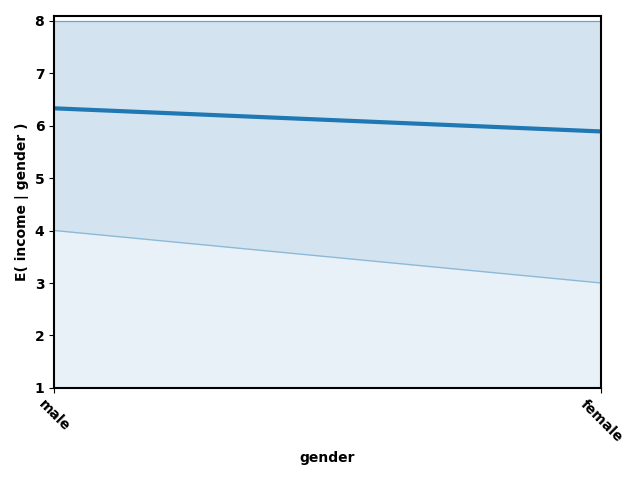

Viz.show: Target =  [('income',)] , Condition =  [('gender',)]
Viz.show: Showing graph =  2D Expected value plot with single condition , power =  1
Viz.show: Controlling for  ['height']
Dimensions =  2 .  Conditionals =  1
Number of points to test for each conditional =  50
Elapsed Time =  4.354


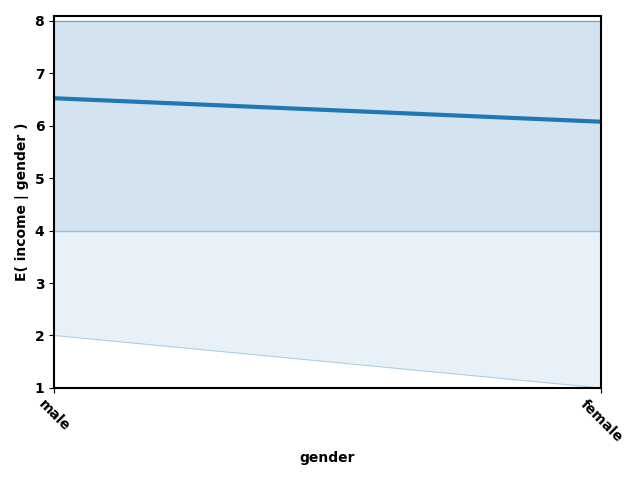

E(income) | male / female)=  6.327688196052297 5.886854995896594
E(income) | male / female, height)=  6.5197027610152265 6.072076959681869


In [47]:
viz.show(probspace=ps, targetSpec=[('income',)], condSpec=['gender'], controlFor=[], gtype='exp')
viz.show(probspace=ps, targetSpec=[('income',)], condSpec=['gender'], controlFor=['height'], gtype='exp')
print('E(income) | male / female)= ', ps.E('income', ('gender','male')), ps.E('income', ('gender','female')))
print('E(income) | male / female, height)= ', ps.E('income', [('gender','male'),'height']),
      ps.E('income', [('gender','female'),'height']))

Viz.show: Target =  [('income',)] , Condition =  [('gender',)]
Viz.show: Showing graph =  2D Expected value plot with single condition , power =  1
Dimensions =  2 .  Conditionals =  1
Number of points to test for each conditional =  50
Elapsed Time =  1.187


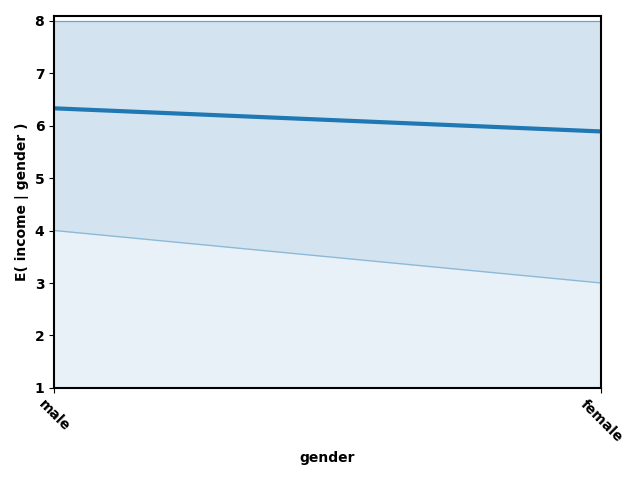

Viz.show: Target =  [('income',)] , Condition =  [('gender',)]
Viz.show: Showing graph =  2D Expected value plot with single condition , power =  1
Viz.show: Controlling for  ['education']
Dimensions =  2 .  Conditionals =  1
Number of points to test for each conditional =  50
Elapsed Time =  7.091


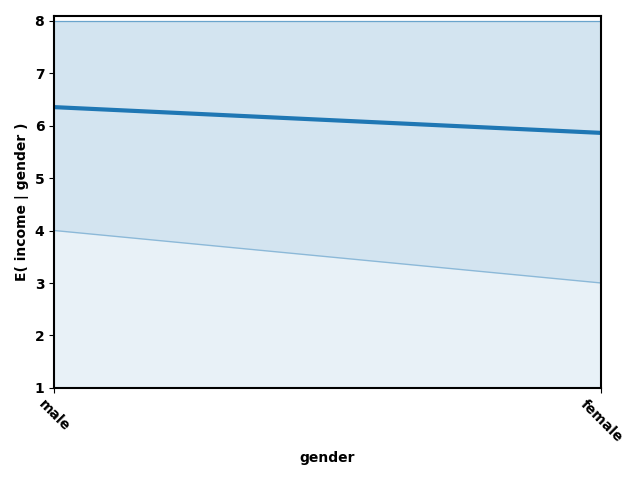

E(income) | male / female)=  6.327688196052297 5.886854995896594
E(income) | male / female, height)=  6.350338954799559 5.859606382853542


In [48]:
viz.show(probspace=ps, targetSpec=[('income',)], condSpec=['gender'], controlFor=[], gtype='exp')
viz.show(probspace=ps, targetSpec=[('income',)], condSpec=['gender'], controlFor=['education'], gtype='exp')
print('E(income) | male / female)= ', ps.E('income', ('gender','male')), ps.E('income', ('gender','female')))
print('E(income) | male / female, height)= ', ps.E('income', [('gender','male'),'education']),
      ps.E('income', [('gender','female'),'education']))

In [3]:
c1 = []
c2 = ['age']
c3 = ['height']
c4 = [('married', 'no'), 'height']
c5 = [('married', 'no'), 'height','education']
c6 = [('married', 'no'), 'height','genhealth']
c7 = [('married', 'no'), 'height','education', 'genhealth']
c8 = [('married', 'no'),'height','age','education', 'genhealth']
c9 = [('married', 'no'),'height','age',('education', '1-college'), 'genhealth']
c = [c1, c2, c3, c4, c5, c6, c7, c8, c9]
targ = 'income'
for cond in c:
    condf = [('gender', 'female')] + cond
    expf = round(ps.E(targ, condf), 2)
    condm = [('gender', 'male')] + cond
    expm = round(ps.E(targ, condm), 2)
    diff = str.rjust(str(round(expf - expm, 2)), 5)
    print(diff, expf, expm, cond)

-0.44 5.89 6.33 []
-0.42 5.96 6.38 ['age']
 0.17 6.05 5.88 ['height']
 0.07 5.22 5.15 [('married', 'no'), 'height']
-0.14 5.28 5.42 [('married', 'no'), 'height', 'education']
 0.02 5.26 5.24 [('married', 'no'), 'height', 'genhealth']
-0.13 5.31 5.44 [('married', 'no'), 'height', 'education', 'genhealth']
-0.24 4.29 4.53 [('married', 'no'), 'height', 'age', 'education', 'genhealth']
 0.16 4.99 4.83 [('married', 'no'), 'height', 'age', ('education', '1-college'), 'genhealth']


### Observations: 
- Women have lower average income than men (-.44)
- Correction for age has little effect on the result (-.42)
- For any given height, women have a slightly higher income than men (+.17)
- That differential mostly evaporates, when we only look at only unmarried individuals (+.07)
- For any given education level and height, there is a slight income advantage for men (-.14)
- For any give level of reported health and height, the incomes are roughtly equal (.02)
- When we control for height, education, and health, men have a slight income advantage (-.13)
- Adding a control for age increases the differential in favor of men (-.27)
- If we only consider individuals with a college degree, women have a slight advantage, when all other factors are controlled (+.16)

In [67]:
#viz.show(probspace=ps, targetSpec=[('income',)], condSpec=['gender'], filtSpec=['education',1], controlFor=[], gtype='exp')
#viz.show(probspace=ps, targetSpec=[('income',)], condSpec=['gender'], filtSpec=['education',1], controlFor=[], gtype='exp')
print('E(income) | male / female)= ', ps.E('income', ('gender','male')), ps.E('income', ('gender','female')))
print('E(income) | male / female, college)= ', ps.E('income', [('gender','male'),('education',1)]),
      ps.E('income', [('gender','female'),('education',1)]))
print('E(income) | male / female, college, height)= ', ps.E('income', [('gender','male'),('education',1)]),
      ps.E('income', [('gender','female'),('education',1),'height']))
print('E(income) | male / female, no-college)= ', 
      ps.E('income', [('gender','male'),('education',3,4,5)]),
      ps.E('income', [('gender','female'),('education',3,4,5)]))
print('E(income) | male / female, no-college, height)= ', 
      ps.E('income', [('gender','male'),('education',3,4,5),'height']),
      ps.E('income', [('gender','female'),('education',3,4,5),'height']))
print('E(income) | male / female, college, height, genhealth)= ', 
      ps.E('income', [('gender','male'),('education',1),'height', 'genhealth']),
      ps.E('income', [('gender','female'),('education',1),'height','genhealth']))
print('E(income) | male / female, college, age)= ', 
      ps.E('income', [('gender','male'),('education',1),'age']),
      ps.E('income', [('gender','female'),('education',1),'age']))
print('E(income) | male / female, college, height, age)= ', 
      ps.E('income', [('gender','male'),('education',1),'height','age']),
      ps.E('income', [('gender','female'),('education',1),'height', 'age']))

E(income) | male / female)=  6.327688196052297 5.886854995896594
E(income) | male / female, college)=  7.143452176894069 6.893295385620305
E(income) | male / female, college, height)=  7.143452176894069 6.942423725481893
E(income) | male / female, no-college)=  5.431792419777004 4.666798228303294
E(income) | male / female, no-college, height)=  5.008203792466079 4.870774429742788
E(income) | male / female, college, height, genhealth)=  6.820475523016788 6.808783592096616
E(income) | male / female, college, age)=  7.218862048527428 6.852875474769929
E(income) | male / female, college, height, age)=  6.815099757621918 6.342142839765287


## Step 6 -- Compare Causal Model with Earlier results and select best approach


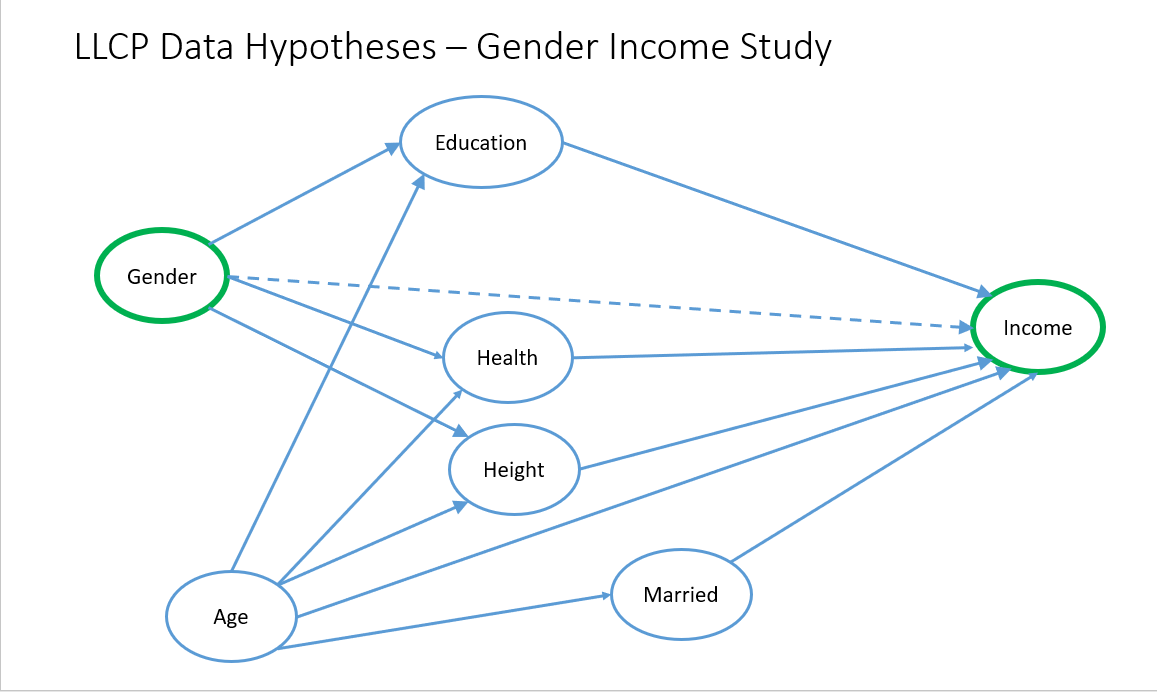

In [61]:
from IPython.display import Image
Image("img/GIS.PNG")

In [88]:
ef1 = ps.E('income', [('married', 'no'), ('gender', 'female'), ('education', 1, 2), 'height', 'weight'])
em1 = ps.E('income', [('married', 'no'), ('gender', 'male'), ('education', 1, 2),  'height', 'weight'])
diff1 = ef1 - em1
print(round(ef1, 3), round(em1, 3), round(diff1,3))
ef2 = ps.E('income', [('married', 'no'), ('gender', 'female'), ('education', 3, 4, 5), 'height', 'weight'])
em2 = ps.E('income', [('married', 'no'), ('gender', 'male'), ('education', 3, 4, 5),  'height', 'weight'])
diff2 = ef2 - em2
print(round(ef2, 3), round(em2, 3), round(diff2,3))
ef3 = ps.E('income', [('married', 'no'), ('gender', 'female'), ('education', 1, 2), 
                      'height', 'weight', ('genhealth', 1, 2, 3)], power=5)
em3 = ps.E('income', [('married', 'no'), ('gender', 'male'), ('education', 1, 2),
                      'height', 'weight', ('genhealth', 1, 2, 3)], power=5)
diff3 = ef3 - em3
print(round(ef3, 3), round(em3, 3), round(diff3,3))
ef4 = ps.E('income', [('married', 'no'), ('gender', 'female'), ('education', 3, 4, 5),
                      'height', 'weight', ('genhealth', 1,2,3)], power=5)
em4 = ps.E('income', [('married', 'no'), ('gender', 'male'), ('education', 3, 4, 5),
                      'height', 'weight', ('genhealth', 1, 2, 3)], power=5)
diff4 = ef4 - em4
print(round(ef4, 3), round(em4, 3), round(diff4,3))


5.371 5.171 0.2
3.974 3.64 0.334
5.501 5.334 0.167
4.03 3.729 0.301


### Observations:
- Controlling for height and weight, unmarried women make slightly more than unmarried men.
- That difference is less pronounced for individuals with college or some college.

